# THUẬT TOÁN RIDGE REGRESSION
# 1. Giới thiệu
Chúng ta sẽ thực hiện dự đoán kết quả thi cuối kỳ dựa trên các điểm thành phần như cw1, mid-term, và cw2. Mô hình sử dụng Ridge Regression (hồi quy Ridge) nhằm giảm thiểu overfitting thông qua tham số regularization λ. Ridge Regression là một dạng hồi quy tuyến tính với một điều khoản thêm vào nhằm phạt các trọng số lớn, làm cho mô hình trở nên ổn định hơn.


# 2. Import các thư viện cần thiết

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

*   NumPy: Thư viện quan trọng cho các phép toán số học trên mảng.

*   matplotlib.pyplot: Sử dụng để vẽ biểu đồ, ví dụ như biểu đồ lỗi theo các giá trị λ.

*   pandas: Được sử dụng để đọc và xử lý dữ liệu từ các file CSV, dữ liệu đầu vào dưới dạng DataFrame.



#3. Mô tả chi tiết các hàm

***Trong ridge_plots.py***

**Hàm plot_errors**

In [2]:
def plot_errors(lamda_values, errors):
    plt.plot(lamda_values, errors)
    plt.xlabel('Giá trị λ')
    plt.ylabel('Lỗi trung bình')
    plt.title('Lỗi theo các giá trị λ')
    plt.show()



*   Vẽ biểu đồ lỗi trung bình theo các giá trị λ, cho phép người dùng thấy rõ mối quan hệ giữa λ và lỗi.



#*Trong ridge_utils.py*

**Hàm load_fold_data**

In [3]:
def load_fold_data(fold_number):
    """Đọc dữ liệu của một fold từ file CSV."""
    train_data = pd.read_csv(f'D:/NgoChucNgoc64KTPM2/HocMay/Student-Final-Grade-ML/data/split/K-folds/fold_{fold_number}_train.csv')
    val_data = pd.read_csv(f'D:/NgoChucNgoc64KTPM2/HocMay/Student-Final-Grade-ML/data/split/K-folds/fold_{fold_number}_val.csv')

    # Tách biến đầu vào (cw1, mid-term, cw2) và biến đầu ra (final)
    X_train = train_data[['cw1', 'mid-term', 'cw2']].values
    y_train = train_data['final'].values

    X_val = val_data[['cw1', 'mid-term', 'cw2']].values
    y_val = val_data['final'].values

    return X_train, y_train, X_val, y_val



*   Đọc dữ liệu cho một fold cụ thể từ file CSV.




**Hàm load_data_from**

In [4]:
def load_data_from(path):
    input = pd.read_csv(f'{path}')
    data = input[['cw1', 'mid-term', 'cw2']].values
    label = input[['final']].values
    return data, label



*  Tải dữ liệu từ file CSV và tách thành đầu vào và đầu ra.




# *trong ridge_model.py*

**Hàm ridge_regression**

In [5]:
def ridge_regression(X, y, lamda):
    ones = np.ones((X.shape[0], 1))
    Xbar = np.concatenate((ones, X), axis=1)

    A = np.dot(Xbar.T, Xbar) + lamda * np.identity(Xbar.shape[1])
    b = np.dot(Xbar.T, y)
    w = np.dot(np.linalg.pinv(A), b)

    return w



*  Đọc dữ liệu cho một fold cụ thể từ file CSV.


**Hàm train_on_folds**

In [6]:
def train_on_folds(fold_count, lamda_values):
    best_lamda = None
    lowest_error = float('inf')
    avg_errors = []

    for lamda in lamda_values:
        fold_errors = []
        for i in range(fold_count):
            X_train, y_train, X_val, y_val = load_fold_data(i)
            w = ridge_regression(X_train, y_train, lamda)
            y_pred = np.dot(np.concatenate((np.ones((X_val.shape[0], 1)), X_val), axis=1), w)
            error = np.mean((y_val - y_pred) ** 2)
            fold_errors.append(error)

        avg_error = np.mean(fold_errors)
        avg_errors.append(avg_error)

        if avg_error < lowest_error:
            lowest_error = avg_error
            best_lamda = lamda

    return best_lamda, avg_errors





*  Hàm này thực hiện cross-validation để tìm λ tối ưu. Nó đọc dữ liệu cho từng fold, huấn luyện mô hình và tính lỗi trung bình.



**Hàm predict**

In [7]:
def predict(X, w):
    """
    Dự đoán đầu ra từ X với trọng số w.
    """
    ones = np.ones((X.shape[0], 1))
    Xbar = np.concatenate((ones, X), axis=1)
    return np.dot(Xbar, w)



*  Dự đoán đầu ra từ đầu vào X với trọng số w.




#4. Thiết lập các giá trị λ cần kiểm tra


In [8]:
lamda_values = np.logspace(-2, 1, num=100)


**Giải thích:**


*  lamda_values là danh sách các giá trị λ từ
10^-2 đến 10^1 (0.01 đến 10), được tạo trên thang logarit. Điều này giúp chúng ta kiểm tra ảnh hưởng của các giá trị lambda khác nhau lên mô hình.

#5. Huấn luyện mô hình và tìm giá trị λ tối ưu


In [9]:
best_lamda, avg_errors = train_on_folds(fold_count=5, lamda_values=lamda_values)
print(f'Giá trị λ tối ưu: {best_lamda}')

Giá trị λ tối ưu: 8.111308307896872


**Giải thích:**

*   train_on_folds: Chúng ta chia dữ liệu thành 5 fold để thực hiện cross-validation. Mỗi lần huấn luyện, mô hình được huấn luyện trên 4 fold và kiểm tra trên 1 fold còn lại.
*  best_lamda: Trả về giá trị λ mang lại lỗi thấp nhất (tốt nhất) trên các fold.







#6. Lưu mô hình với λ tốt nhất

In [10]:
X_train, y_train = load_data_from(f'D:/NgoChucNgoc64KTPM2/HocMay/Student-Final-Grade-ML/data/split/train_data.csv')
w = ridge_regression(X_train, y_train, best_lamda)
print('Trọng số w = ', w)
np.save('ridge_model_weights.npy', w)


Trọng số w =  [[-0.07498871]
 [-0.02272326]
 [ 0.08349226]
 [ 0.93073971]]


**Giải thích:**

*  ridge_regression: Hàm chính thực hiện thuật toán Ridge Regression để tính trọng số w dựa trên giá trị λ tốt nhất.
*   np.save: Lưu trọng số đã tính toán được vào file .npy để sau này có thể tải lại và sử dụng khi dự đoán





#7. Dự đoán trên tập test


In [11]:
X_test, y_test = load_data_from(f'D:/NgoChucNgoc64KTPM2/HocMay/Student-Final-Grade-ML/data/split/test_data.csv')
weights = np.load('ridge_model_weights.npy')  # Tải trọng số từ file
y_pred = predict(X_test, weights)


**Giải thích:**

*  Chúng ta tải dữ liệu test và trọng số đã huấn luyện để dự đoán kết quả.
*  predict: Hàm dự đoán đầu ra dựa trên dữ liệu test và trọng số w đã huấn luyện.






#8. Tính lỗi và vẽ biểu đồ lỗi theo các giá trị λ

Lỗi trung bình trên tập test: 0.3647525925528757


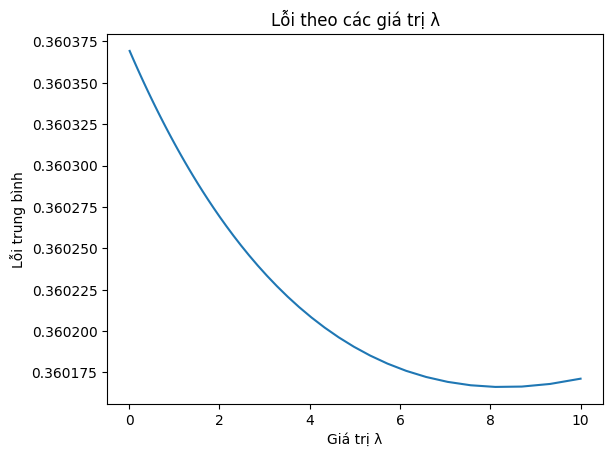

In [12]:
mse_test = np.mean((y_test - y_pred) ** 2)
print(f'Lỗi trung bình trên tập test: {mse_test}')
plot_errors(lamda_values, avg_errors)

**Giải thích:**

*   mse_test: Tính lỗi bình phương trung bình (Mean Squared Error - MSE) trên tập test, giúp đánh giá mức độ chính xác của mô hình.
*   plot_errors: Vẽ biểu đồ lỗi theo từng giá trị λ, cho phép trực quan hóa kết quả để kiểm tra xem mô hình có hoạt động tốt hay không.






# 9.Hàm vẽ biểu đồ phân tán

In [13]:
def plot_final_scores_comparison(X_test, y_test, y_pred):
    # Vẽ biểu đồ phân tán
    plt.figure(figsize=(6, 6))  # Điều chỉnh kích thước biểu đồ (bé hơn)

    plt.scatter(y_test, y_pred, color='blue', label='Dự đoán', alpha=0.7)

    # Vẽ đường thẳng y = x để so sánh
    x = np.linspace(0, 10, 100)
    plt.plot(x, x, color='red', linestyle='--', label='Giá trị thực')

    # Giới hạn trục từ 0 đến 10
    plt.xlim(0, 10)
    plt.ylim(0, 10)

    # Thêm các thông số của biểu đồ
    plt.xlabel('Giá trị nhãn thực tế')
    plt.ylabel('Giá trị nhãn dự đoán ')
    plt.title('So sánh nhãn thực tế và nhãn lý thuyết')
    plt.axhline(0, color='black', linewidth=0.5, ls='--')
    plt.axvline(0, color='black', linewidth=0.5, ls='--')
    plt.grid(True)
    plt.legend()

    # Hiển thị biểu đồ
    plt.show()


**Giải thích :**

# 10.Tải Dữ Liệu và Huấn Luyện Ridge Regression

**1.Tải dữ liệu trên fold**

In [14]:
def load_fold_data(fold_number):
    train_data = pd.read_csv(f'D:/NgoChucNgoc64KTPM2/HocMay/Student-Final-Grade-ML/data/split/K-folds/fold_{fold_number}_train.csv')
    val_data = pd.read_csv(f'D:/NgoChucNgoc64KTPM2/HocMay/Student-Final-Grade-ML/data/split/K-folds/fold_{fold_number}_val.csv')

    # Tách biến đầu vào (cw1, mid-term, cw2) và biến đầu ra (final)
    X_train = train_data[['cw1', 'mid-term', 'cw2']].values
    y_train = train_data['final'].values

    X_val = val_data[['cw1', 'mid-term', 'cw2']].values
    y_val = val_data['final'].values

    return X_train, y_train, X_val, y_val




*   Hàm load_fold_data(i) sẽ lấy dữ liệu của từng fold từ tệp CSV chứa dữ liệu train và validation của fold đó.
*   X_train và X_val: Là các ma trận chứa các thuộc tính .Các cột cw1, mid-term, và cw2 là các giá trị đầu vào
*   y_train và y_val: Là các vector chứa nhãn mục tiêu là cột final là điểm thi cuối cùng mô hình dự đoán




**2.Huấn luyện mô hình Ridge Regression**

In [15]:
def ridge_regression(X, y, lamda):
    """
    X: Ma trận thuộc tính  (các cột cw1, mid-term, cw2).
    y: nhãn (cột final).
    lamda: Tham số regularization λ.
    """
    # Thêm cột bias (cột toàn số 1)
    ones = np.ones((X.shape[0], 1))
    Xbar = np.concatenate((ones, X), axis=1)

    # Tính trọng số Ridge Regression theo công thức
    A = np.dot(Xbar.T, Xbar) + lamda * np.identity(Xbar.shape[1])
    b = np.dot(Xbar.T, y)
    w = np.dot(np.linalg.pinv(A), b)

    return w

**Giải thích :**



*   Thêm cột bias vào ma trận thuộc tính X.
*   Tính trọng số w dựa trên công thức của Ridge Regression
*   Trả về trọng số w.






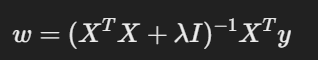



3.Dự đoán nhãn mục tiêu

In [16]:
def predict(X, w):
    """
    Dự đoán đầu ra từ X với trọng số w.
    """
    ones = np.ones((X.shape[0], 1))
    Xbar = np.concatenate((ones, X), axis=1)
    return np.dot(Xbar, w)

**Giải thích**




*  ones = tạo ra một ma trận toàn giá trị 1 với số hàng bằng số mẫu dữ liệu trong X và một cột duy nhất.
*  np.concatenate: Hàm này dùng để nối hai mảng (hoặc ma trận) lại với nhau.
*  Trả về nhãn đầu ra từ dữ liệu X bằng cách nhân ma trận X đã thêm bias với trọng số w.




**4.Giá trị sai số **

In [17]:
train_error = np.mean((y_train - y_train_pred) ** 2)


NameError: name 'y_train_pred' is not defined

**Giải thích :**



*   Nhãn thực tế y_train và nhãn dự đoán y_train_pred được bình phương để tất cả các giá trị sai số dương




**Công thức tính MSE :**

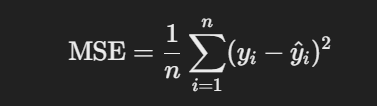

### 11.Huấn Luyện Ridge Regression Trên Các Fold

In [19]:
import ridge_model as model
import ridge_utils as utils
import ridge_plots as plot

ModuleNotFoundError: No module named 'ridge_model'

**1.Fold_0**

*- fold_0_train*

In [21]:
X_train, y_train = load_data_from('D:/NgoChucNgoc64KTPM2/HocMay/Student-Final-Grade-ML/data/split/K-folds/fold_0_train.csv')

In [22]:
X_test, y_test = load_data_from('D:/NgoChucNgoc64KTPM2/HocMay/Student-Final-Grade-ML/data/split/K-folds/fold_0_train.csv')

Giải thích :



*    Đọc dữ liệu từ fold_0_train để huấn luyện mô hình với giá trị λ tốt nhất




In [24]:
w = ridge_regression(X_train, y_train, best_lamda)
print('Trọng số w = ', w)

Trọng số w =  [[-0.01063364]
 [-0.01134697]
 [ 0.07258773]
 [ 0.92138226]]


Trọng số w =  [[-0.01063364]
 [-0.01134697]
 [ 0.07258773]
 [ 0.92138226]]


In [25]:

np.save('ridge_model_weights.npy', w)

**Giải thích :**



*   Huấn luyện mô hình Ridge Regression với giá trị λ tối ưu và được trọng số huan luyện vào file




In [26]:
weights = np.load('ridge_model_weights.npy')
y_pred = predict(X_test, weights)

**Giải thích :**



*   Tải trọng số từ file vừa lưu rồi dự đoán nhãn lý thuyết



In [27]:
mse_test = np.mean((y_test - y_pred) ** 2)
print(f'Lỗi trung bình trên tập train: {mse_test}')


Lỗi trung bình trên tập train: 0.3617713761484752


Lỗi trung bình trên tập train: 0.3617713761484752

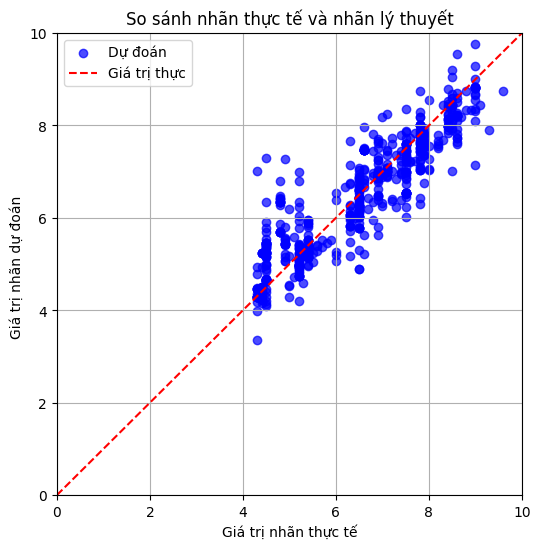

In [28]:
plot_final_scores_comparison(X_test, y_test, y_pred)

**Biểu đồ phân tán giữa nhãn thực tế và nhãn lý thuyết**

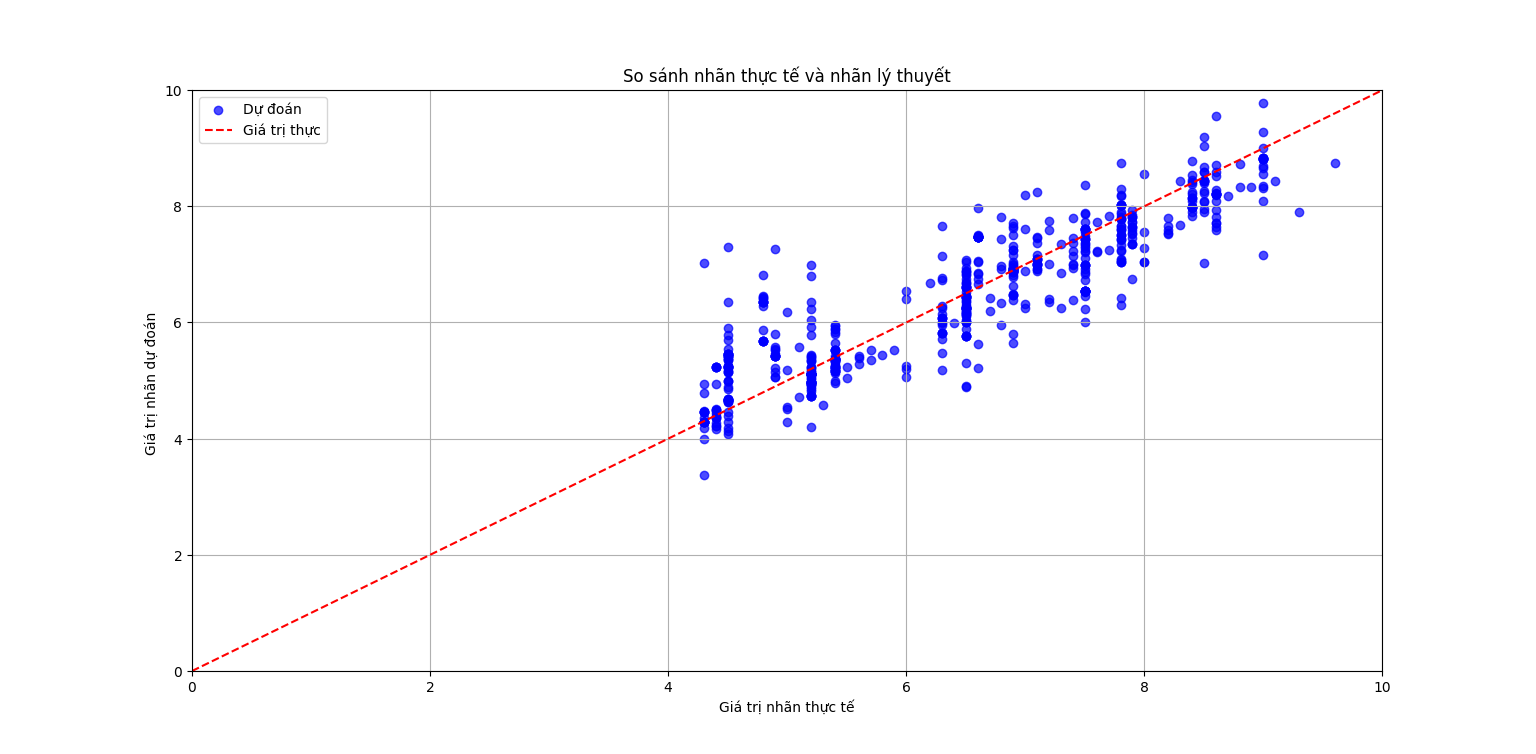

*- fold_0_val*

In [30]:
X_train, y_train = load_data_from('D:/NgoChucNgoc64KTPM2/HocMay/Student-Final-Grade-ML/data/split/K-folds/fold_0_val.csv')

In [32]:
X_test, y_test = load_data_from(f'D:/NgoChucNgoc64KTPM2/HocMay/Student-Final-Grade-ML/data/split/K-folds/fold_0_val.csv')

In [34]:
w = ridge_regression(X_train, y_train, best_lamda)
print('Trọng số w = ', w)

Trọng số w =  [[-0.11477397]
 [-0.06309927]
 [ 0.12455469]
 [ 0.93201628]]


Trọng số w =  [[-0.11477397]
 [-0.06309927]
 [ 0.12455469]
 [ 0.93201628]]


In [35]:
mse_test = np.mean((y_test - y_pred) ** 2)
print(f'Lỗi trung bình trên tập val: {mse_test}')

ValueError: operands could not be broadcast together with shapes (165,1) (658,1) 

Lỗi trung bình trên tập val: 0.3362177963973936

ValueError: x and y must be the same size

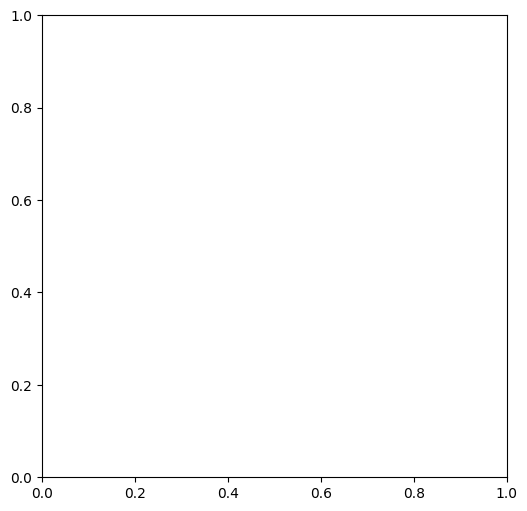

In [36]:
plot_final_scores_comparison(X_test, y_test, y_pred)

**Biểu đồ phân tán giữa nhãn thực tế và nhãn lý thuyết**

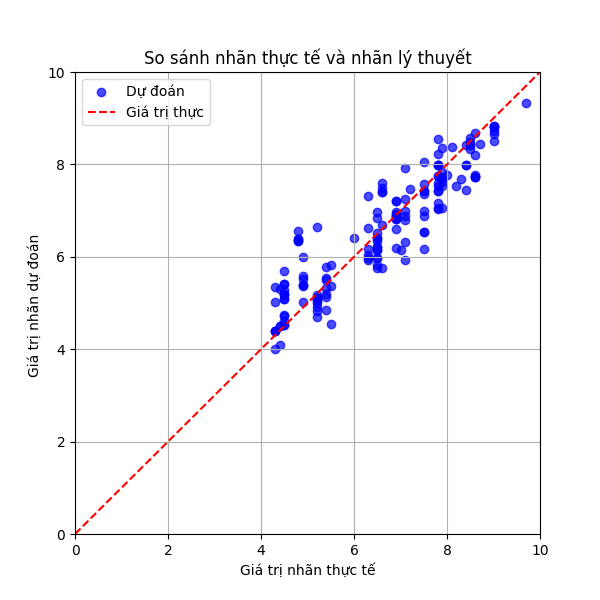

**2.Fold_1**

*-fold_1_train*

In [38]:
X_train, y_train = load_data_from(f'D:/NgoChucNgoc64KTPM2/HocMay/Student-Final-Grade-ML/data/split/K-folds/fold_1_train.csv')

In [40]:
X_test, y_test = load_data_from(f'D:/NgoChucNgoc64KTPM2/HocMay/Student-Final-Grade-ML/data/split/K-folds/fold_1_train.csv')

In [42]:
w = ridge_regression(X_train, y_train, best_lamda)
print('Trọng số w = ', w)

Trọng số w =  [[-0.07975344]
 [-0.03160928]
 [ 0.08841714]
 [ 0.93758243]]


Trọng số w =  [[-0.07975344]
 [-0.03160928]
 [ 0.08841714]
 [ 0.93758243]]


In [43]:
mse_test = np.mean((y_test - y_pred) ** 2)
print(f'Lỗi trung bình trên tập train: {mse_test}')

Lỗi trung bình trên tập train: 3.42908711791749


Lỗi trung bình trên tập train: 0.35086300694987094

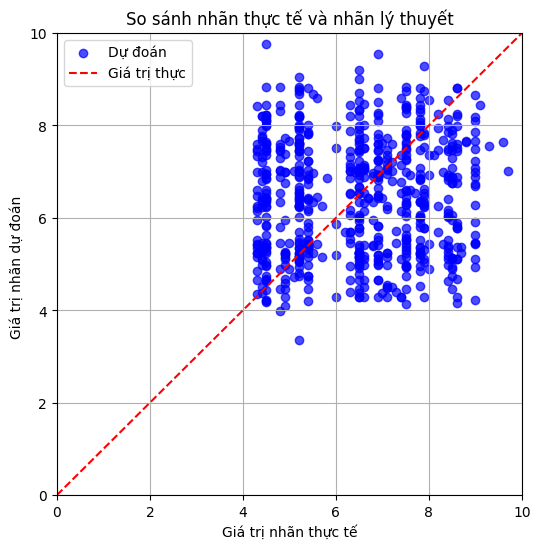

In [44]:
plot_final_scores_comparison(X_test, y_test, y_pred)

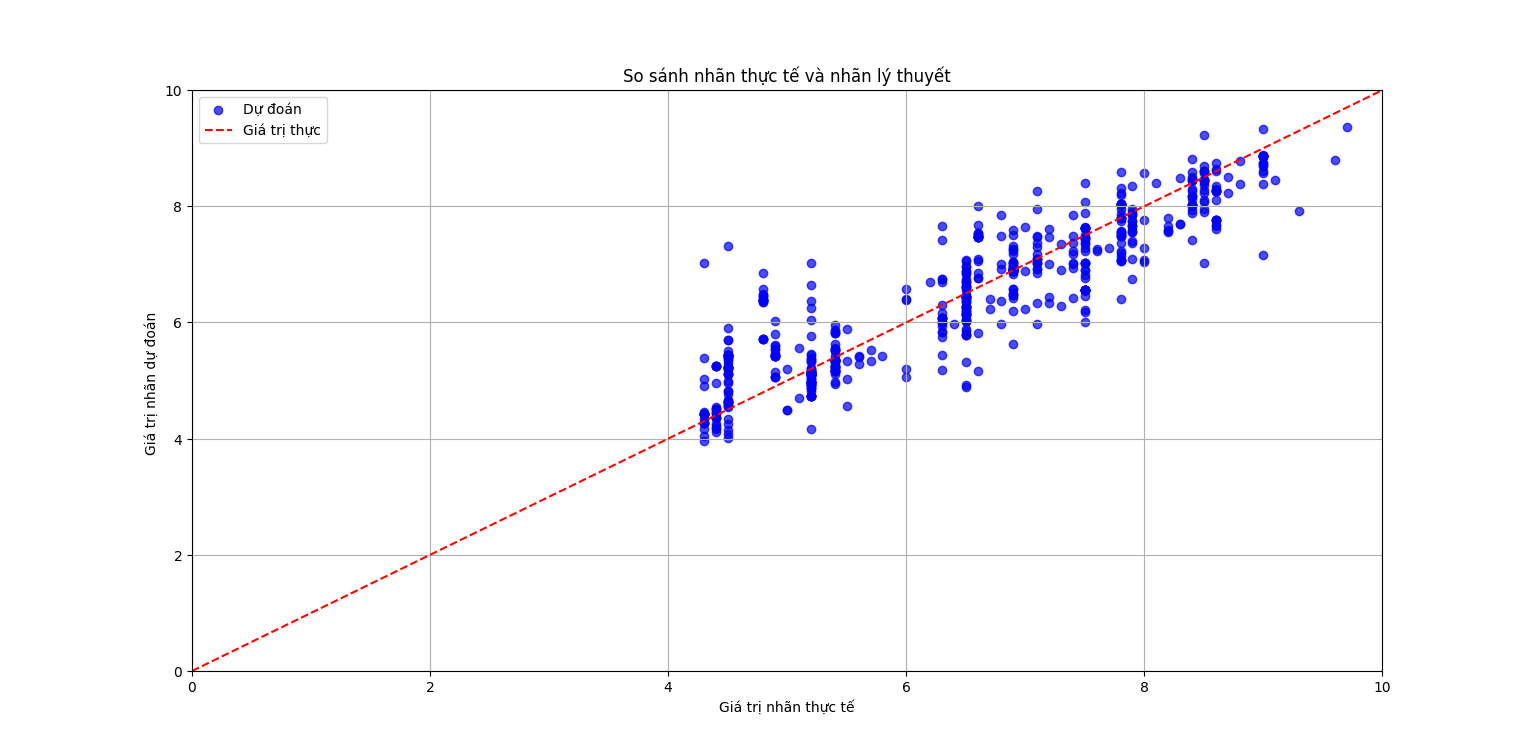

*- flod_1_val*

In [ ]:
X_train, y_train = load_data_from(f'D:/NgoChucNgoc64KTPM2/HocMay/Student-Final-Grade-ML/data/split/K-folds/fold_1_val.csv')


In [45]:
X_test, y_test = load_data_from(f'D:/NgoChucNgoc64KTPM2/HocMay/Student-Final-Grade-ML/data/split/K-folds/fold_1_val.csv')

In [46]:
w = ridge_regression(X_train, y_train, best_lamda)
print('Trọng số w = ', w)

Trọng số w =  [[-0.07975344]
 [-0.03160928]
 [ 0.08841714]
 [ 0.93758243]]


Trọng số w =  [[0.03121956]
 [0.01799462]
 [0.0640157 ]
 [0.88484943]]



In [47]:
mse_test = np.mean((y_test - y_pred) ** 2)
print(f'Lỗi trung bình trên tập val: {mse_test}')

ValueError: operands could not be broadcast together with shapes (165,1) (658,1) 

Lỗi trung bình trên tập val: 0.3759143196354197

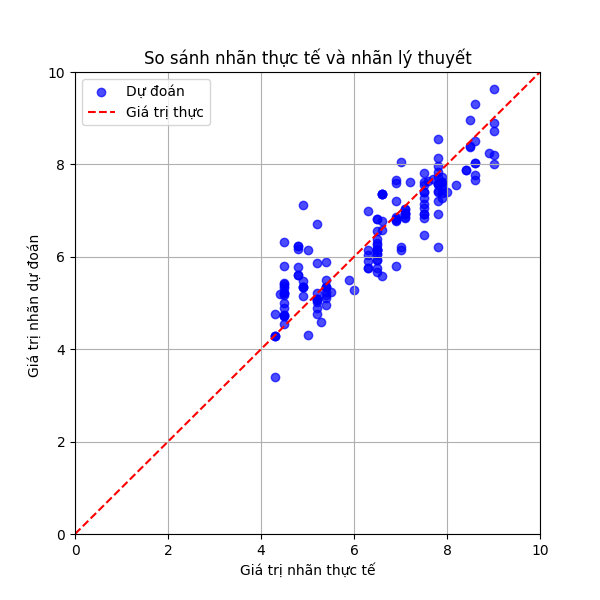

**Làm tương tự với fold 2,3,4 ta thu được biểu đồ so sánh nhãn thực tế với nhãn lý thuyết**

- fold_2_train

Lỗi trung bình trên tập train: 0.3557492517673904

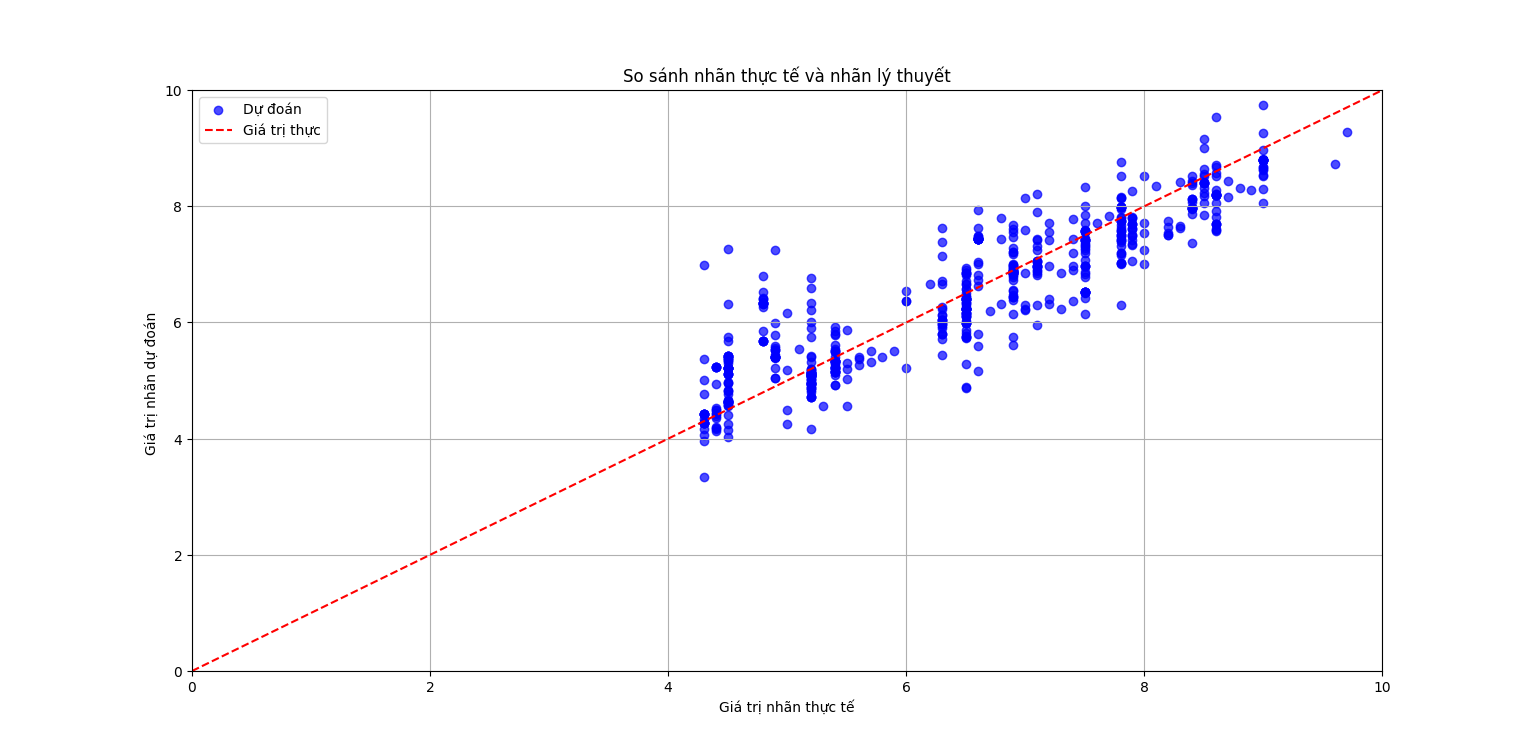

- fold_2_val

Lỗi trung bình trên tập val: 0.35467856560601574

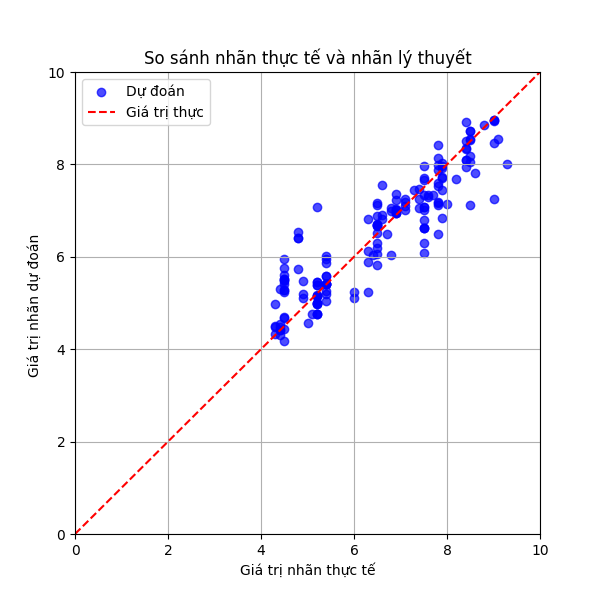

- fold_3_train

Lỗi trung bình trên tập train: 0.3622438617426833

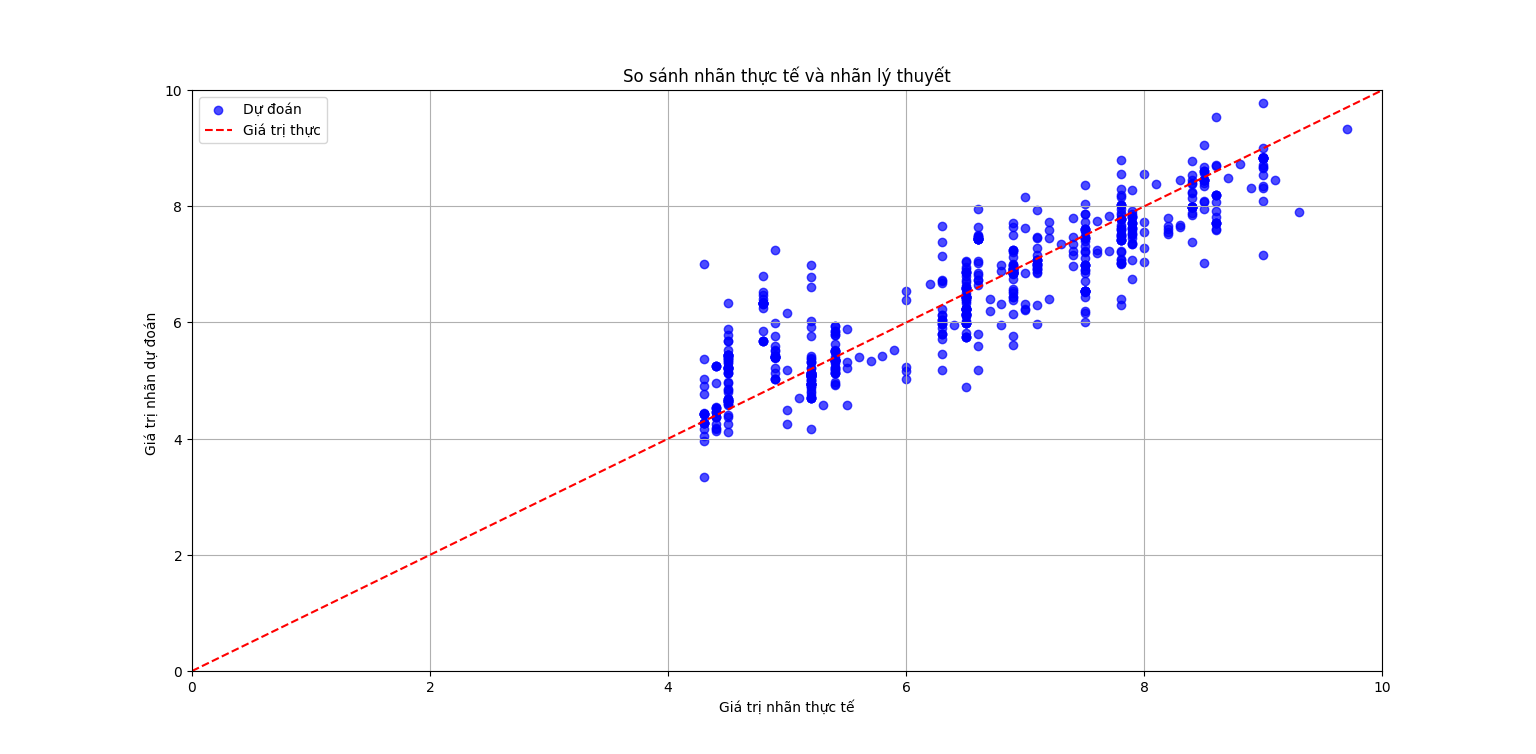

- fold_3_val

Lỗi trung bình trên tập val: 0.3354432498930942

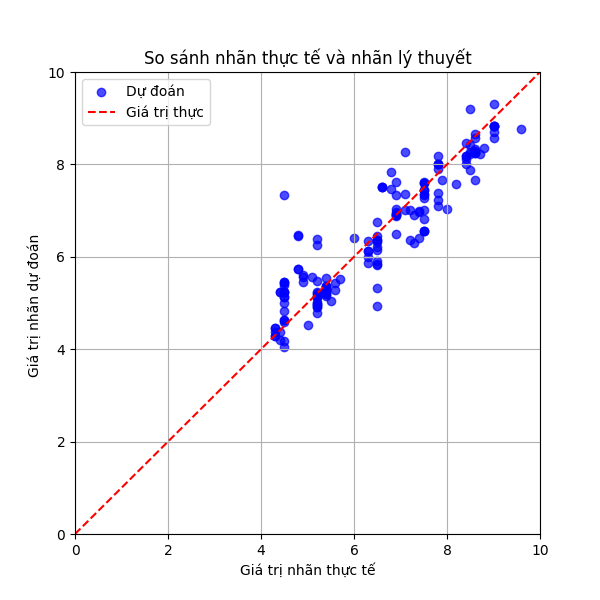

- fold_4_train

Lỗi trung bình trên tập train: 0.35399415156026076

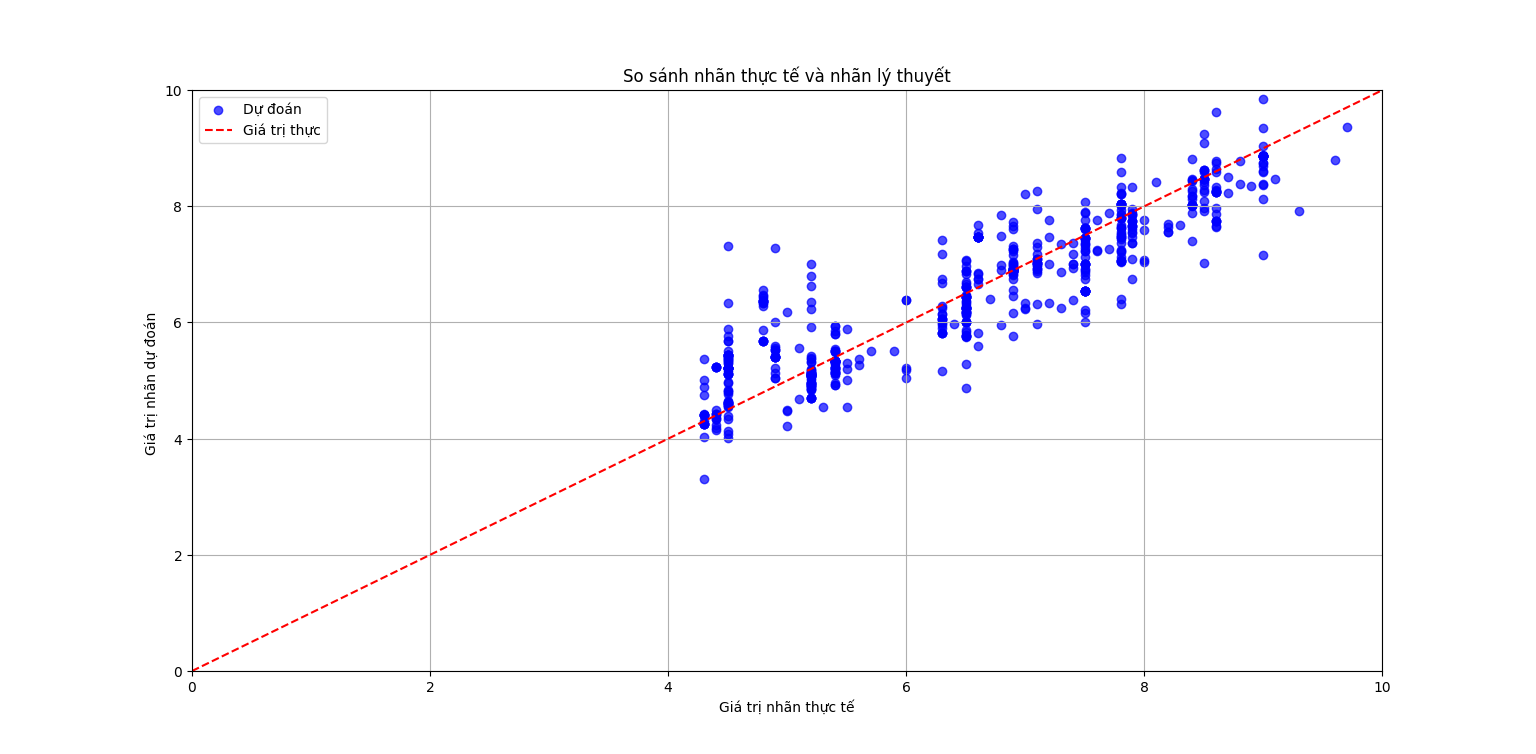

- fold_4_val

Lỗi trung bình trên tập val: 0.36277859641812227

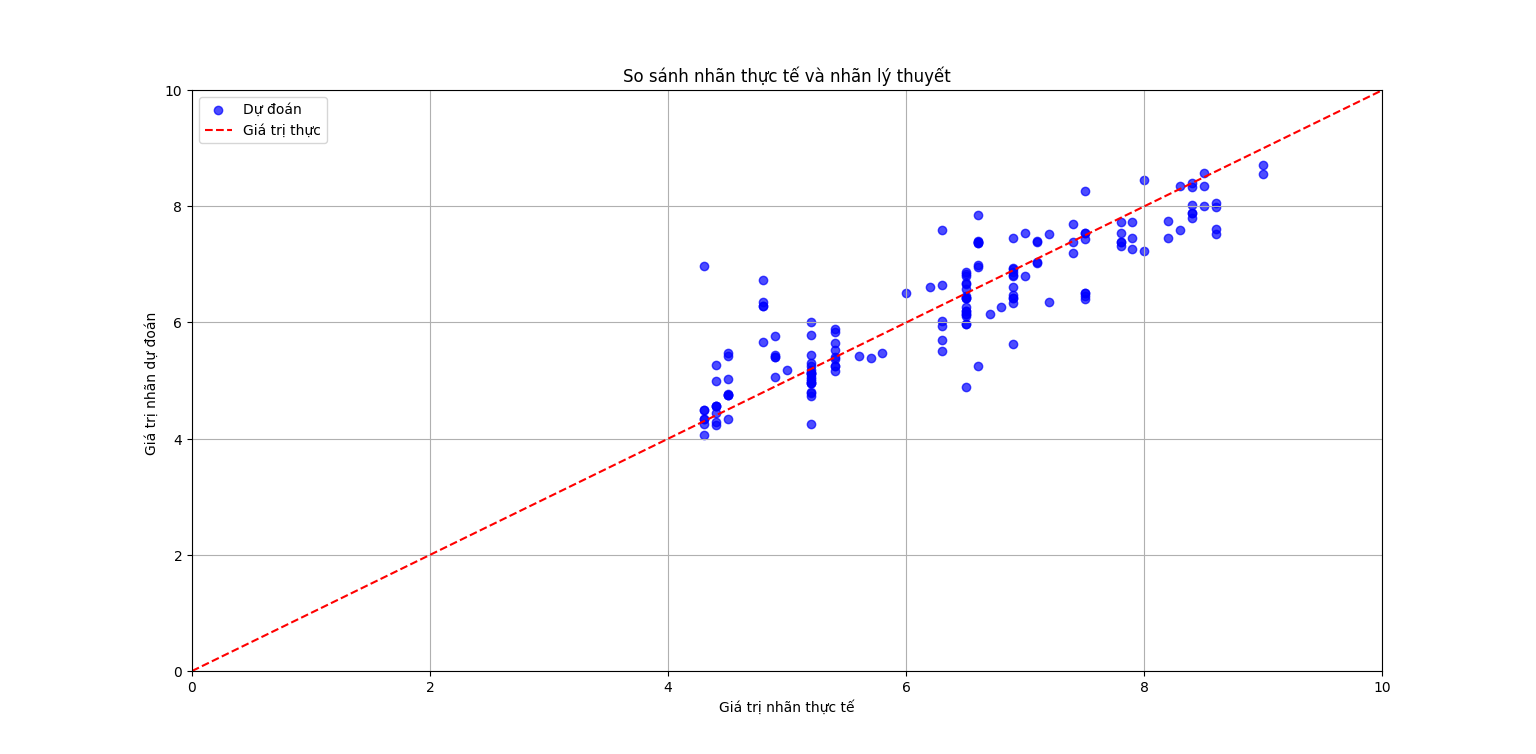

# 12.Giá Trị Sai Số Trung Bình Của Fold

AVG = (MSE(Train_error)+MSE(Val_error))/2

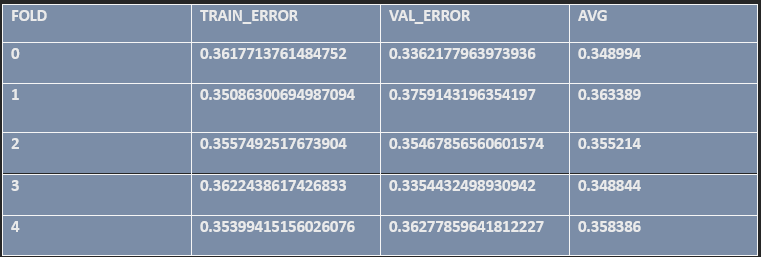